In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
air =pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
air 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
def range_x(x):
    return (np.min(x),np.max(x))
for i in range(1,12):
    print(air.columns[i],range_x(air.iloc[:,i]),end=' ')
    print()

Balance (0, 1704838) 
Qual_miles (0, 11148) 
cc1_miles (1, 5) 
cc2_miles (1, 3) 
cc3_miles (1, 5) 
Bonus_miles (0, 263685) 
Bonus_trans (0, 86) 
Flight_miles_12mo (0, 30817) 
Flight_trans_12 (0, 53) 
Days_since_enroll (2, 8296) 
Award? (0, 1) 


In [5]:
# from range of values it is evident that cc1_miles,cc2_miles,cc3_miles,award column doesn't provide much info(less variance)
# so dropping those columns
/#air_1 =air.drop(columns=['cc1_miles', 'cc2_miles', 'cc3_miles','Award?','ID#'],axis=1)
#air_1

In [6]:
x = air
x

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
#feature scaling
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [8]:
#calculating wcss to get optimum number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

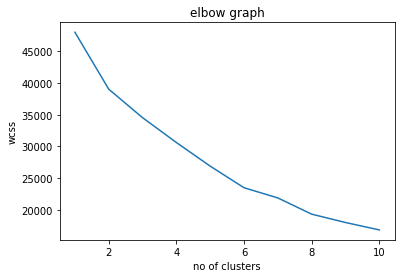

In [9]:
#creating elbow graph
plt.plot(range(1,11),wcss)
plt.title('elbow graph')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [19]:
#elbow occurs at 3 and 5 clusters
kmeans = KMeans(n_clusters = 5 ,init = 'k-means++', random_state = 0).fit(x)
air['cluster']=kmeans.labels_
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [20]:
air.iloc[:,1: ].groupby('cluster').agg('mean').sort_values('Balance')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
0,39496.143234,102.062046,1.365677,1.017162,1.000000,6075.994059,7.695710,196.655446,0.590759,2144.929373,0.200660
2,57027.711404,97.356090,1.354538,1.018619,1.000776,5833.957331,7.953452,229.442979,0.706749,5712.619860,0.249030
4,125513.678711,164.642578,3.931641,1.001953,1.001953,44298.882812,19.274414,369.927734,1.105469,4938.950195,0.703125
1,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,194803.871795,810.397436,2.198718,1.038462,1.000000,32475.410256,27.737179,5510.717949,16.224359,4681.352564,0.820513


In [21]:
air.iloc[:,[1,2,3,4,5,-1]].groupby('cluster').agg('mean').sort_values('Balance')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles
cluster,,,,,
0,39496.143234,102.062046,1.365677,1.017162,1.000000
2,57027.711404,97.356090,1.354538,1.018619,1.000776
4,125513.678711,164.642578,3.931641,1.001953,1.001953
1,138061.400000,78.800000,3.466667,1.000000,4.066667
3,194803.871795,810.397436,2.198718,1.038462,1.000000


In [25]:
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([2, 2, 2, ..., 0, 0, 0])

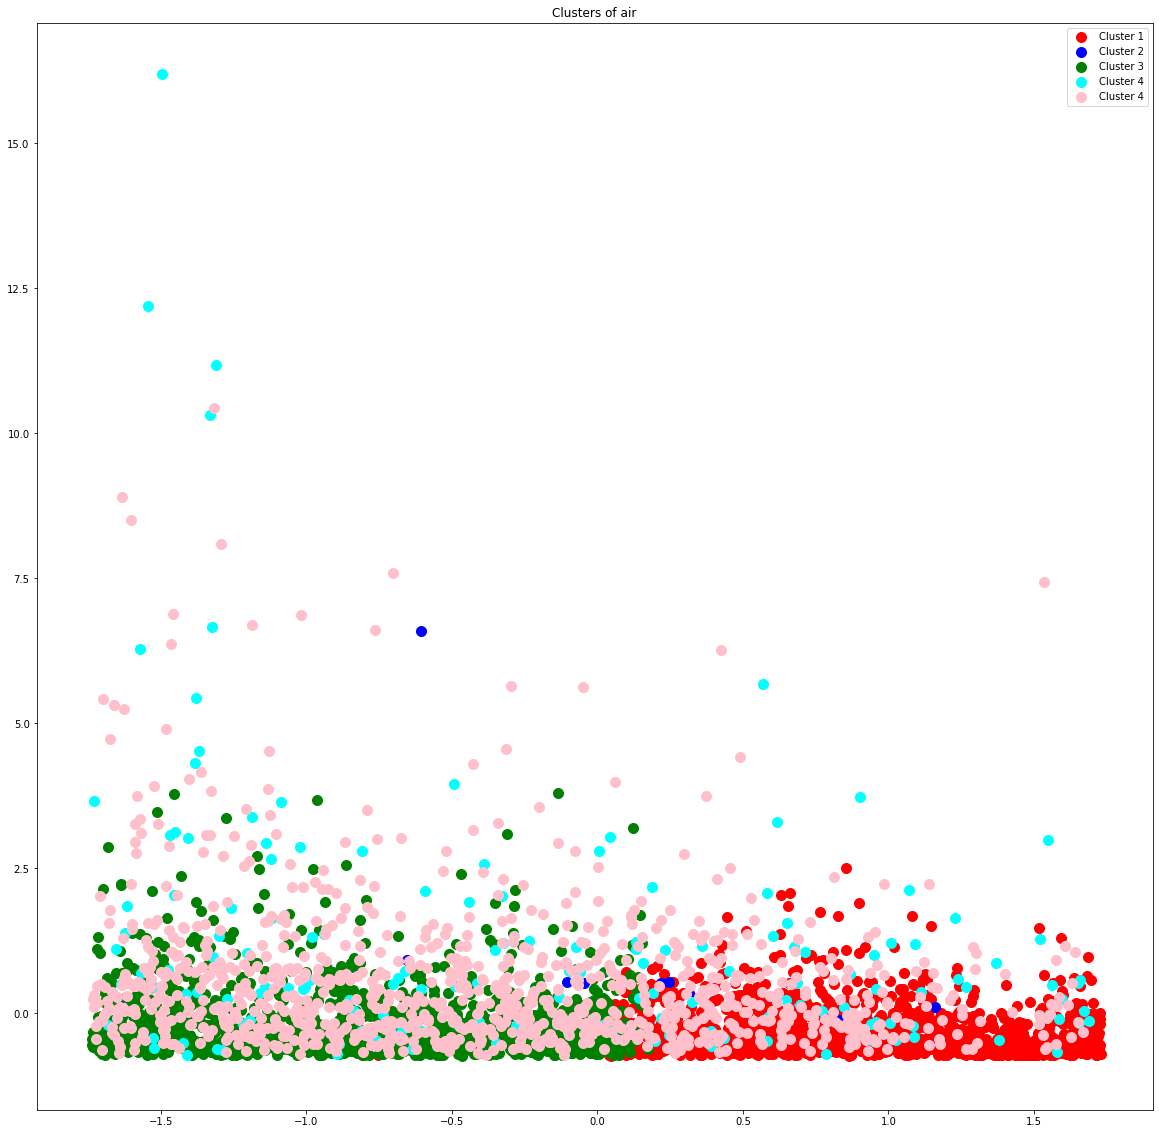

In [30]:
plt.figure(figsize=(20 , 20 ))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster 4')
plt.title('Clusters of air')
plt.legend()
plt.show()